# Plotting variance of the $f_{lmn}$ and $f_{lmn}^0$ modes vs. $P(k)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generate_f_lmn import generate_f_lmn
from utils import calc_n_max_l
from precompute_sph_bessel_zeros import loadSphericalBesselZeros

sphericalBesselZeros = loadSphericalBesselZeros("zeros.csv")


In [2]:

l_max = 15
r_max = 0.75
k_max = 200
Nbins = 16

def get_k_bin_boundaries_and_heights(f_lmn):
    k_bin_dividers = np.linspace(0, k_max, Nbins + 1)
    k_bin_contents = [[] for _ in range(Nbins)]


    for l in range(l_max + 1):
        n_max_l = calc_n_max_l(l, k_max, r_max)

        for n in range(n_max_l + 1):
            k_ln = sphericalBesselZeros[l][n] / r_max

            # Loop through all k bins to see which k bin this (l,n) mode belongs in

            for i in range(Nbins):

                if k_ln >= k_bin_dividers[i] and k_ln < k_bin_dividers[i+1]:

                    # Add |f_lmn|^2 for all m
                    for m in range(l + 1):
                        f_lmn_squared = f_lmn[l][m][n] * np.conj(f_lmn[l][m][n])

                        k_bin_contents[i].append(f_lmn_squared)

                    break

    # Divide the contents of each k bin by the number of modes, so that we're taking an average

    for i in range(Nbins):
        k_bin_contents_i = np.array(k_bin_contents[i])
        N_modes_in_bin = np.size(k_bin_contents_i)

        k_bin_contents[i] = np.sum(k_bin_contents_i) / N_modes_in_bin

    return k_bin_dividers, k_bin_contents

In [3]:
# Or, load f_lmn_0 from a file
omega_matter_true = 0.315
omega_matter_0 = 0.315
l_max = 15
k_max = 200
r_max_true = 0.75
# phi_r_max = 0.65

# saveFileName = "data/f_lmn_0_true-%.3f_fiducial-%.3f_l_max-%d_k_max-%.2f_r_max_true-%.3f_phi_r_max-%.3f.npy" % (omega_matter_true, omega_matter_0, l_max, k_max, r_max_true, phi_r_max)

saveFileName = "data/f_lmn_0_true-0.315_fiducial-0.315_l_max-15_k_max-200.00_r_max_true-0.750_R-0.250_P-amp_1.00.npy"

f_lmn = np.load(saveFileName)

In [50]:
def plotVarianceOfModes(f_lmn, show=True, label="", color=None, symbol="f"):
    k_bin_dividers, k_bin_contents = get_k_bin_boundaries_and_heights(f_lmn)

    plt.figure(dpi=300)
    plt.bar(k_bin_dividers[:-1], k_bin_contents, align="edge", width=k_bin_dividers[1]-k_bin_dividers[0], label=label, color=color)

    plt.xlabel("k", fontsize=14)
    plt.ylabel("$\\frac{1}{N_{\\mathrm{modes}}} \sum_{lmn} |%s_{lmn}|^2$" % symbol, fontsize=14)
    # plt.title("P(k) = %d" % amplitude_of_top_hat)

    if show:
        plt.show()

### Comparing the variance of the generated modes, $f_{lmn}$, to the expected power spectrum $P(k)=1$

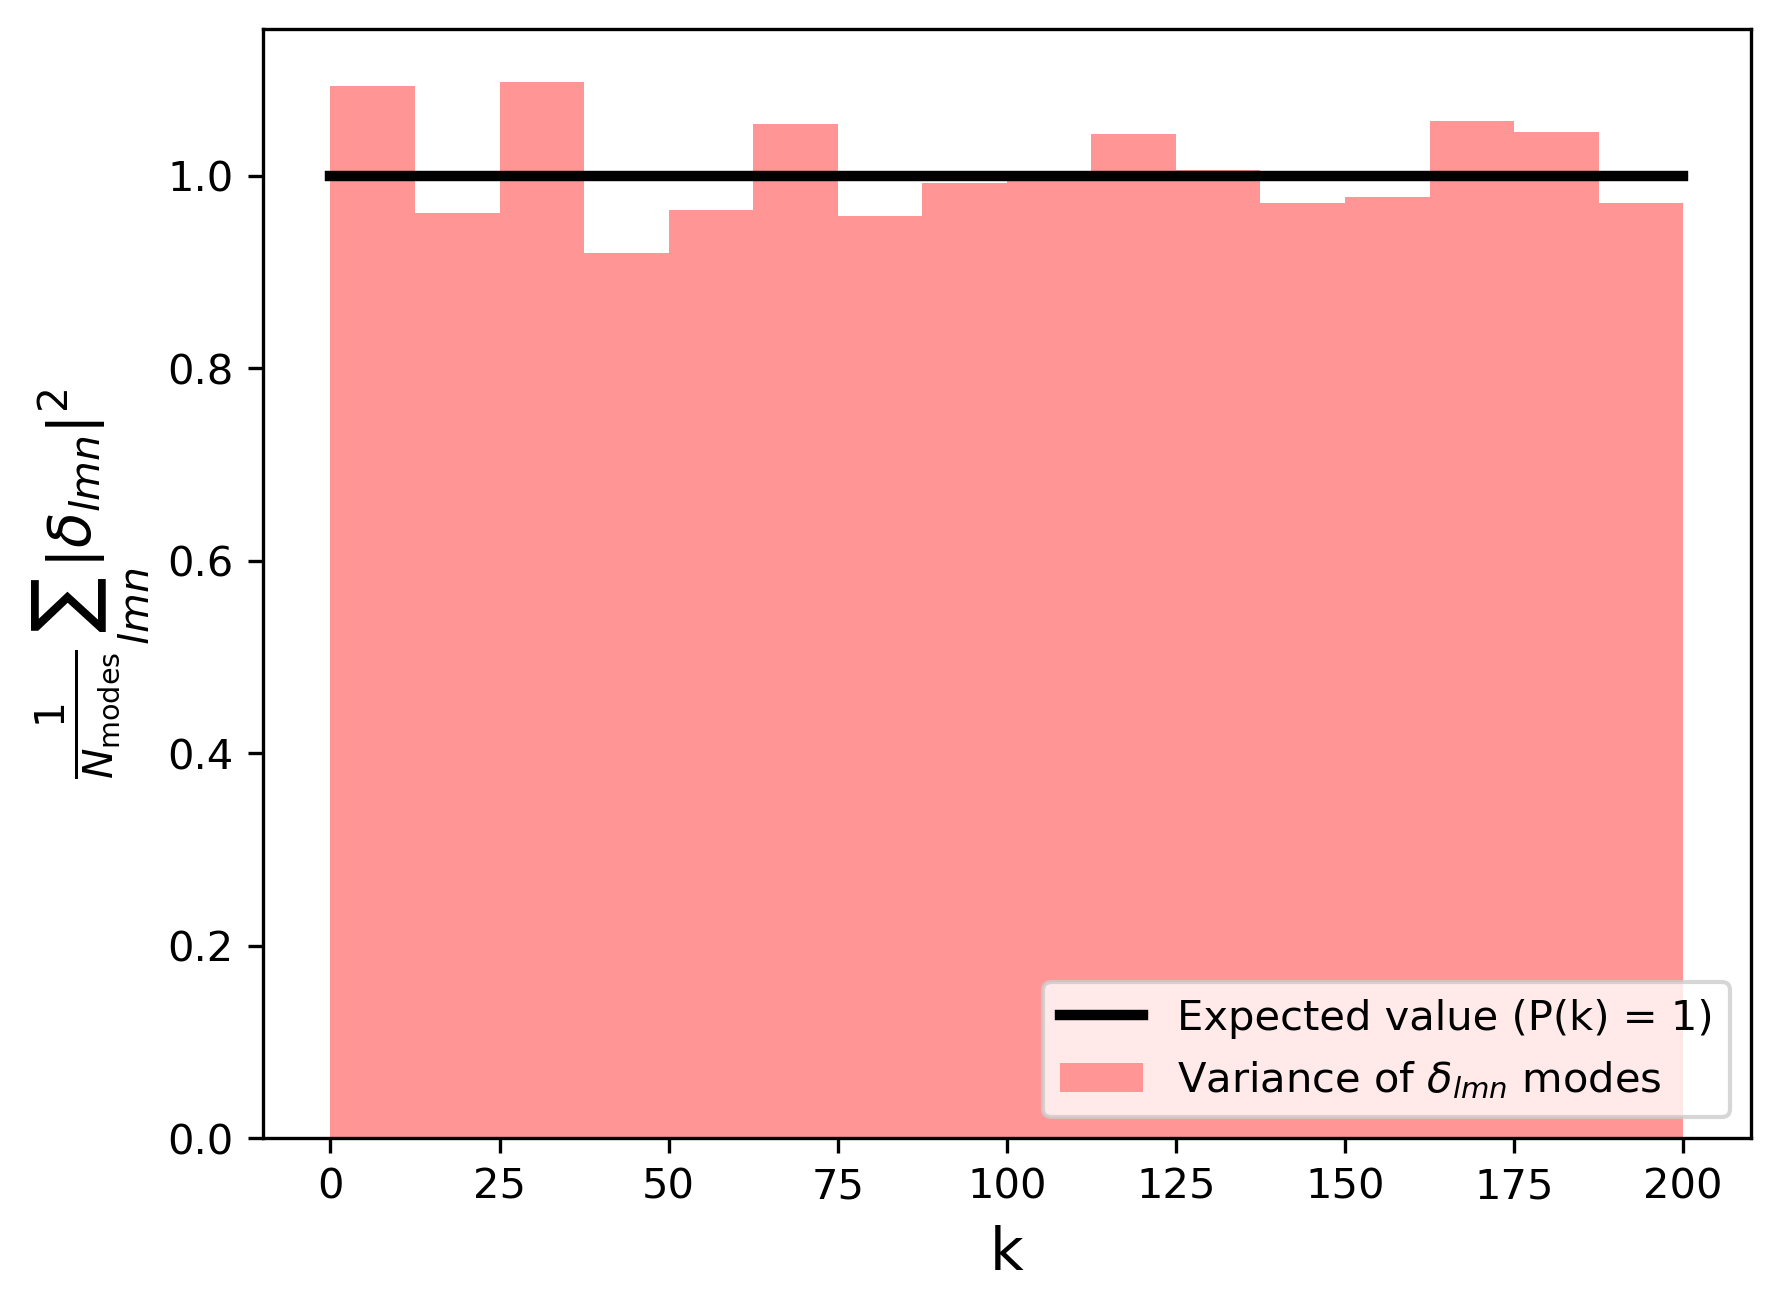

In [51]:
# Power spectrum:
# amplitude_of_top_hat = 1

# def p(k, k_max=300):
#     if k < k_max:
#         return amplitude_of_top_hat
#     else:
#         return 0

# f_lmn = generate_f_lmn(l_max, r_max, k_max)
plotVarianceOfModes(f_lmn, show=False, label="Variance of $\delta_{lmn}$ modes", color="#FF9594", symbol=r"\delta")

x = np.linspace(0, k_max, 1000)
y = [1 for _ in x]
plt.plot(x, y, label="Expected value (P(k) = 1)", c="k", linewidth=2.5)
# plt.plot(x, y, label="Expected value (P(k) = 1)", c="k", linewidth=2)
plt.legend(loc="lower right")
plt.savefig("variance.svg")
plt.show()

### Plotting the variance of the $f_{lmn}^0$ modes, and comparing to the theory

We have that

$$
\langle n_{lmn}n_{l'm'n'}^{*} \rangle = \delta_{l l'}^{K} \delta_{m m'}^{K} \sum_{n''} P(k_{ln''})  W_{nn''}^{l} W_{n'n''}^{l'}
$$

So the variance of the modes is expected to be

$$
\langle |n_{lmn}|^2 \rangle = \sum_{n''} P(k_{ln''})  |W_{nn''}^{l}|^2.
$$

(This is with $\bar{f}=1$.)

In [10]:
# Load f_lmn_0 from a file
omega_matter_true = 0.315
omega_matter_0 = 0.315
l_max = 15
k_max = 200
r_max_true = 0.75
# phi_r_max = 0.65

# saveFileName = "data/f_lmn_0_true-%.3f_fiducial-%.3f_l_max-%d_k_max-%.2f_r_max_true-%.3f_phi_r_max-%.3f.npy" % (omega_matter_true, omega_matter_0, l_max, k_max, r_max_true, phi_r_max)
saveFileName = "data/f_lmn_0_true-0.315_fiducial-0.315_l_max-15_k_max-200.00_r_max_true-0.750_R-0.250_P-amp_1.00.npy"

f_lmn_0 = np.load(saveFileName)

In [13]:
from compute_likelihood_selection_func_shot_noise_no_tayl_exp import computeExpectation

def get_k_bin_boundaries_and_expected_heights(P, W):
    k_bin_dividers = np.linspace(0, k_max, Nbins + 1)
    k_bin_contents = [[] for _ in range(Nbins)]


    for l in range(l_max + 1):
        n_max_l = calc_n_max_l(l, k_max, r_max)

        for n in range(n_max_l + 1):
            k_ln = sphericalBesselZeros[l][n] / r_max

            # Loop through all k bins to see which k bin this (l,n) mode belongs in

            for i in range(Nbins):

                if k_ln >= k_bin_dividers[i] and k_ln < k_bin_dividers[i+1]:

                    # Add |f_lmn|^2 for all m
                    for m in range(l + 1):
                        nbar = 0
                        f_lmn_0_expected_variance = computeExpectation(l, 0, n, l, 0, n, k_max, r_max, P, W, nbar)

                        k_bin_contents[i].append(f_lmn_0_expected_variance)

                    break

    # Divide the contents of each k bin by the number of modes, so that we're taking an average

    for i in range(Nbins):
        k_bin_contents_i = np.array(k_bin_contents[i])
        N_modes_in_bin = np.size(k_bin_contents_i)

        k_bin_contents[i] = np.sum(k_bin_contents_i) / N_modes_in_bin

    return k_bin_dividers, k_bin_contents

In [14]:
# W_saveFileName = "data/W_omega_m-%.5f_omega_m_0-%.5f_l_max-%d_k_max-%.2f_r_max_0-%.4f_phi_r_max-%.3f.npy" % (0.215, omega_matter_0, l_max, k_max, r_max, phi_r_max)
W_saveFileName = "data/W_no_tayl_exp_zeros_omega_m-0.31500_omega_m_0-0.31500_l_max-15_k_max-200.00_r_max_0-0.7500_R-0.250.npy"
W = np.load(W_saveFileName)

k_bin_dividers, expected_k_bin_heights = get_k_bin_boundaries_and_expected_heights(lambda x: 1, W)
k_bin_midpoints = (k_bin_dividers[1:] + k_bin_dividers[:-1])/2

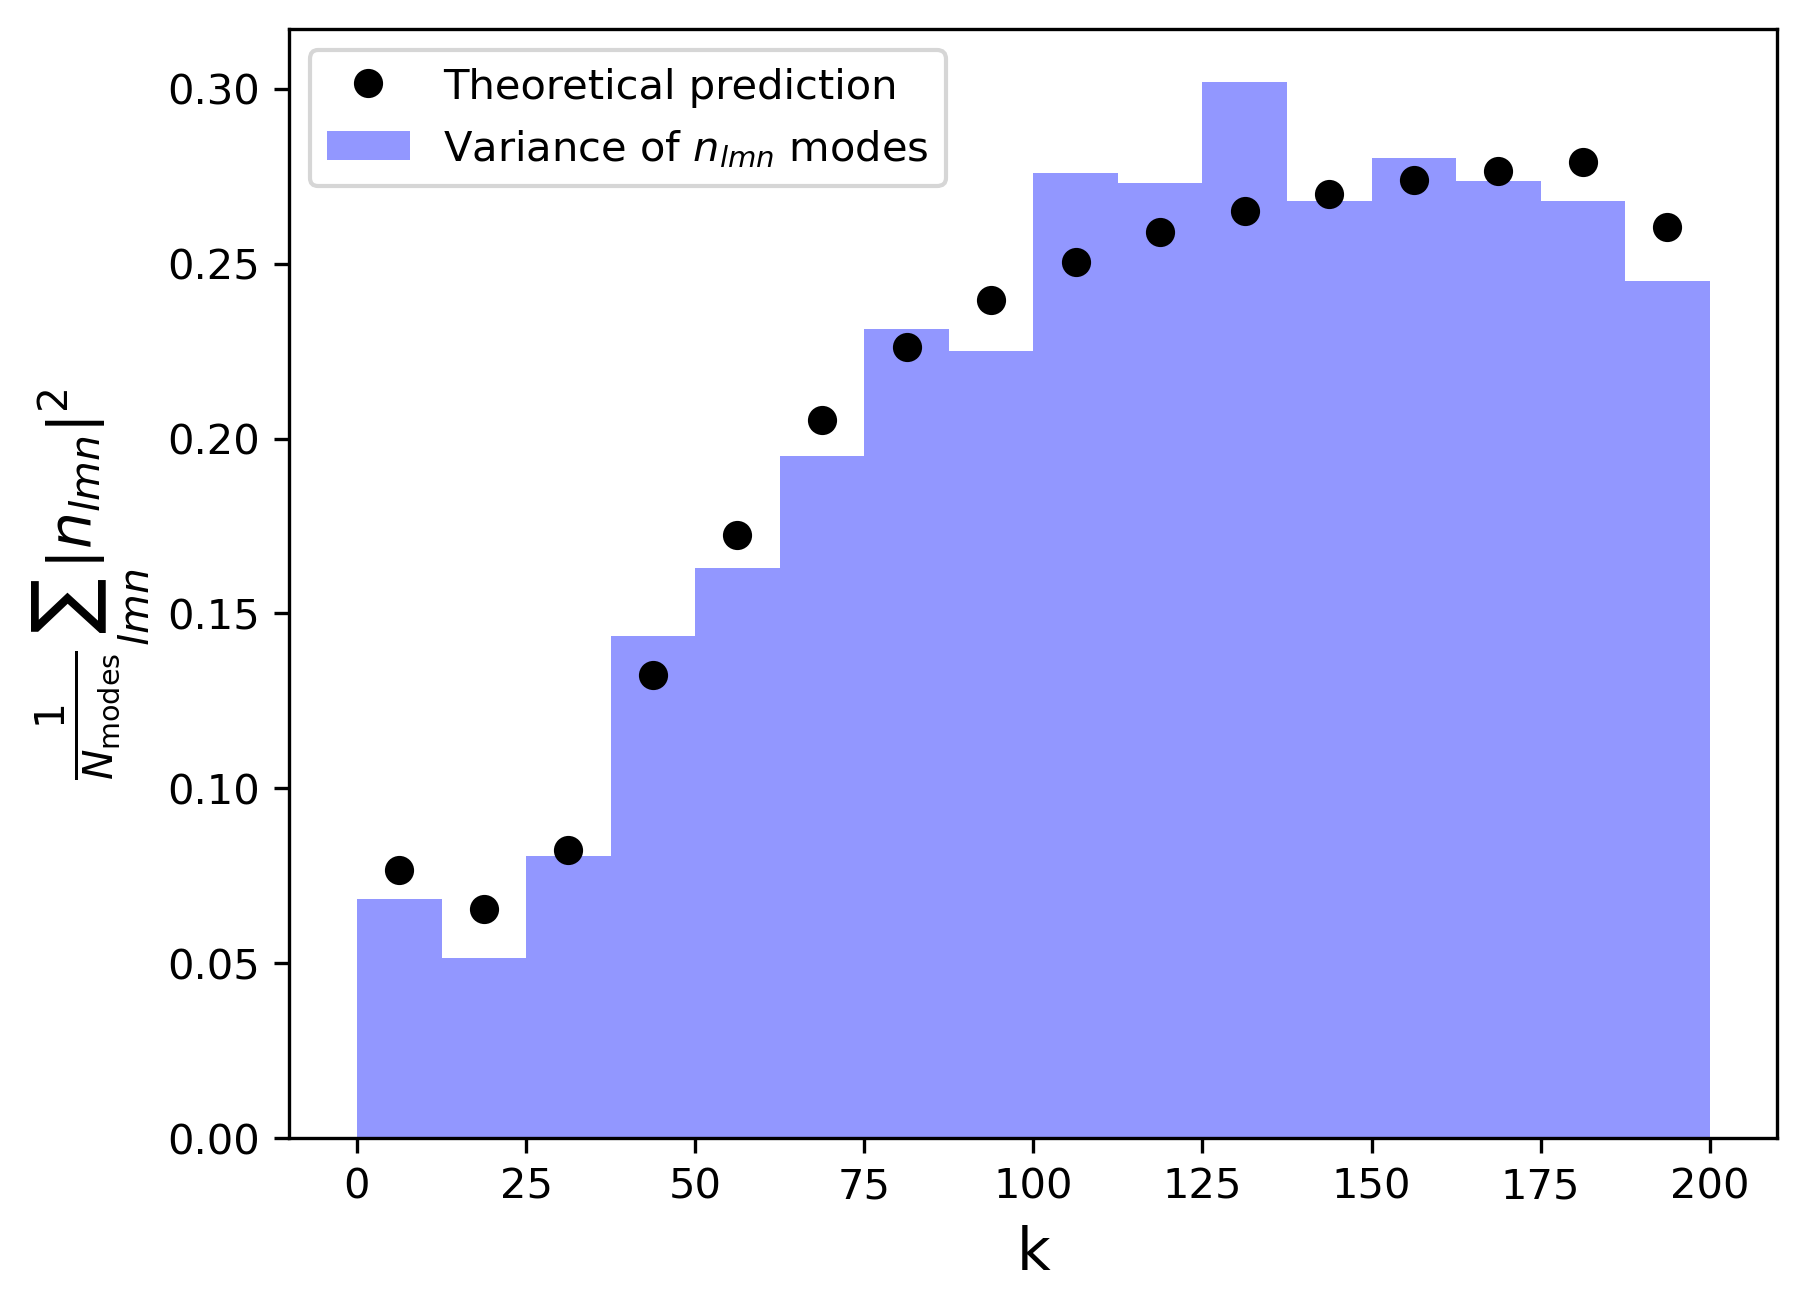

In [52]:
plotVarianceOfModes(f_lmn_0, show=False, label="Variance of $n_{lmn}$ modes", color="#9297FF", symbol="n")
plt.plot(k_bin_midpoints, expected_k_bin_heights, "o", label="Theoretical prediction", c="k")

plt.legend()
plt.savefig("variance2.svg")
plt.show()